In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Feature Engineering & Filling Missing Values

Let's find all missing values in train dataset, than in test dataset. They may be different, anyways we have to fill all of them (if we will use all the columns as a features).

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Embarked 

In [9]:
train_data.Embarked[train_data.Embarked.isnull() == True]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [10]:
train_data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [11]:
train_data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                             NaN
Name: 829, dtype: object

As you can see, these two women have no information in Embarked field, but fortunately they have any other data. Let's explore where all first class passengers embarked. 

In [12]:
full_Embarked = pd.concat([train_data[(train_data.Pclass == 1) & (train_data.Sex == 'female')].Embarked,
                    test_data[(test_data.Pclass == 1) & (test_data.Sex == 'female')].Embarked], ignore_index=False)
full_Embarked.describe()

count     142
unique      3
top         C
freq       71
Name: Embarked, dtype: object

So, let our two women also embarked at Cherbourg.

In [13]:
train_data['Embarked_Imputed'] = train_data.Embarked.isnull().astype('int')
test_data['Embarked_Imputed'] = test_data.Embarked.isnull().astype('int')

In [14]:
train_data.Embarked.fillna('C', inplace=True)

In [15]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [16]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## Name

In [17]:
full_Name = pd.concat([train_data.Name, test_data.Name])

In [18]:
prefixes = set()
for string in full_Name:
    prefix = string[string.find(',') + 2:string.find('.')]
    prefixes.add(prefix)

prefixes

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

1. Col - colonel 
2. Major 
3. Capt - capitan 


1. the Countess
2. Lady, Sir, Mme, 
3. Don, Dona, Jonkheer, Mr, Miss, Mlle, Mrs, Ms


1. Dr - doctor
2. Master - boy
3. Rev - man of church 

In [19]:
titul_1, titul_2 = ['Col', 'Major', 'Capt', 'the Countess'], ['Lady', 'Sir', 'Mme']

I will work with "Master" prefix, because it can say a lot about Age, even if Age value is NaN. Also I decided to add new feature called Titul to take into account the social status of each passenger. 

In [20]:
train_data.insert(6, 'BoyOrWoman', 0)
train_data.insert(4, 'Titul', 3)

In [21]:
for i in range(train_data.shape[0]):
    if train_data.Name[i].find('Master') != -1 or train_data.Sex[i] == 'female':
        train_data.at[i, 'BoyOrWoman'] = 1

In [22]:
for i in range(train_data.shape[0]):
    for first in titul_1:
        if train_data.Name[i].find(first) != -1:
            train_data.at[i, 'Titul'] = 1
    for second in titul_2:
        if train_data.Name[i].find(second) != -1:
            train_data.at[i, 'Titul'] = 2

In [23]:
train_data

,PassengerId,Survived,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",3,male,22.0,0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3,female,38.0,1,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",3,female,26.0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,female,35.0,1,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",3,male,35.0,0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",3,male,27.0,0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",3,female,19.0,1,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",3,male,26.0,0,0,0,111369,30.0000,C148,C,0


In [24]:
test_data.insert(5, 'BoyOrWoman', 0)
test_data.insert(3, 'Titul', 3)

In [25]:
for i in range(test_data.shape[0]):
    if test_data.Name[i].find('Master') != -1 or test_data.Sex[i] == 'female':
        test_data.at[i, 'BoyOrWoman'] = 1

In [26]:
for i in range(test_data.shape[0]):
    for first in titul_1:
        if test_data.Name[i].find(first) != -1:
            test_data.at[i, 'Titul'] = 1
    for second in titul_2:
        if test_data.Name[i].find(second) != -1:
            test_data.at[i, 'Titul'] = 2

In [27]:
test_data

,PassengerId,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed
0,892,3,"Kelly, Mr. James",3,male,34.5,0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",3,female,47.0,1,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",3,male,62.0,0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",3,male,27.0,0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.0,1,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",3,male,NaN,0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",3,female,39.0,1,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",3,male,38.5,0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",3,male,NaN,0,0,0,359309,8.0500,NaN,S,0


## Fare

There are some "0" values if Fare column in train and test datasets for many reasons. I decided to fill zero values with mean values for certain class. 

In [28]:
mean = pd.concat([train_data.Fare[train_data.Fare != 0],
                         test_data.Fare[test_data.Fare != 0]]).mean()

In [29]:
train_data.Fare[train_data.Fare == 0]

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

In [30]:
train_data['Fare_Imputed'] = [0 if i not in train_data.Fare[train_data.Fare == 0].index else 1 for i in range(891)]

In [31]:
test_data.Fare[test_data.Fare == 0]

266    0.0
372    0.0
Name: Fare, dtype: float64

In [32]:
test_data['Fare_Imputed'] = [0 if (i not in test_data.Fare[test_data.Fare == 0].index) and (test_data.Fare[i] != np.nan)
                             else 1 for i in range(418)]

In [33]:
train_data.Fare.replace(0, mean, inplace=True)
test_data.Fare.replace(0, mean, inplace=True)
test_data.Fare.fillna(mean, inplace=True)

In [34]:
test_data.Fare.isnull().any()

False

In [35]:
test_data.Fare.describe()

count    418.000000
mean      35.784065
std       55.785974
min        3.170800
25%        7.895800
50%       14.479150
75%       31.634400
max      512.329200
Name: Fare, dtype: float64

In [36]:
train_data.Fare.describe()

count    891.000000
mean      32.772119
std       49.514382
min        4.012500
25%        7.925000
50%       15.100000
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
train_data

,PassengerId,Survived,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Fare_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",3,male,22.0,0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3,female,38.0,1,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",3,female,26.0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,female,35.0,1,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",3,male,35.0,0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",3,male,27.0,0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",3,female,19.0,1,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",3,male,26.0,0,0,0,111369,30.0000,C148,C,0,0


In [38]:
test_data

,PassengerId,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Fare_Imputed
0,892,3,"Kelly, Mr. James",3,male,34.5,0,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",3,female,47.0,1,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",3,male,62.0,0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",3,male,27.0,0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.0,1,1,1,3101298,12.2875,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",3,male,NaN,0,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",3,female,39.0,1,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",3,male,38.5,0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",3,male,NaN,0,0,0,359309,8.0500,NaN,S,0,0


## Age

I filled all NaN values with mean value for certain class and sex group

In [39]:
train_data['Age_Imputed'] = train_data.Age.isnull().astype('int')
test_data['Age_Imputed'] = test_data.Age.isnull().astype('int')

### Women

In [40]:
mean_w_1 = pd.concat([train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 1)],
                        test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 1)]]).mean()

mean_w_2 = pd.concat([train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 2)],
                        test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 2)]]).mean()

mean_w_3 = pd.concat([train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 3)],
                        test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 3)]]).mean()

In [41]:
mean_w_1, mean_w_2, mean_w_3

(37.037593984962406, 27.499223300970876, 22.185328947368422)

In [42]:
missing_w_1 = train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 1)]
missing_w_2 = train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 2)]
missing_w_3 = train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 3)]

missing_w_1_test = test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 1)]
missing_w_2_test = test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 2)]
missing_w_3_test = test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 3)]

In [43]:
for i in missing_w_1.index:
    if missing_w_1.isnull()[i]:
        train_data.at[i, 'Age'] = mean_w_1
for i in missing_w_2.index:
    if missing_w_2.isnull()[i]:
        train_data.at[i, 'Age'] = mean_w_2
for i in missing_w_3.index:
    if missing_w_3.isnull()[i]:
        train_data.at[i, 'Age'] = mean_w_3

In [44]:
for i in missing_w_1_test.index:
    if missing_w_1_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_w_1
for i in missing_w_2_test.index:
    if missing_w_2_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_w_2
for i in missing_w_3_test.index:
    if missing_w_3_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_w_3

### Boys

In [45]:
mean_boys = pd.concat([train_data.Age[(train_data.Name.str.find('Master') != -1)],
                      test_data.Age[(test_data.Name.str.find('Master') != -1)]]).mean()

In [46]:
mean_boys

5.482641509433963

In [47]:
missing_boys = train_data.Age[(train_data.Name.str.find('Master') != -1)]
missing_boys_test = test_data.Age[(test_data.Name.str.find('Master') != -1)] 

In [48]:
for i in missing_boys.index:
    if missing_boys.isnull()[i]:
        train_data.at[i, 'Age'] = mean_boys

In [49]:
for i in missing_boys_test.index:
    if missing_boys_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_boys

### Men

In [50]:
mean_m_1 = pd.concat([train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 1)],
                        test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 1)]]).mean()

mean_m_2 = pd.concat([train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 2)],
                        test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 2)]]).mean()

mean_m_3 = pd.concat([train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 3)],
                        test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 3)]]).mean()

In [51]:
mean_m_1, mean_m_2, mean_m_3

(41.02927152317881, 30.815379746835443, 25.503336504413085)

In [52]:
missing_m_1 = train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 1)]
missing_m_2 = train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 2)]
missing_m_3 = train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 3)]

missing_m_1_test = test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 1)]
missing_m_2_test = test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 2)]
missing_m_3_test = test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 3)]

In [53]:
for i in missing_m_1.index:
    if missing_m_1.isnull()[i]:
        train_data.at[i, 'Age'] = mean_m_1
for i in missing_m_2.index:
    if missing_m_2.isnull()[i]:
        train_data.at[i, 'Age'] = mean_m_2
for i in missing_m_3.index:
    if missing_m_3.isnull()[i]:
        train_data.at[i, 'Age'] = mean_m_3

In [54]:
for i in missing_m_1_test.index:
    if missing_m_1_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_m_1
for i in missing_m_2_test.index:
    if missing_m_2_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_m_2
for i in missing_m_3_test.index:
    if missing_m_3_test.isnull()[i]:
        test_data.at[i, 'Age'] = mean_m_3

In [55]:
test_data.isnull().sum()

PassengerId           0
Pclass                0
Name                  0
Titul                 0
Sex                   0
Age                   0
BoyOrWoman            0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
Embarked_Imputed      0
Fare_Imputed          0
Age_Imputed           0
dtype: int64

In [56]:
train_data.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Titul                 0
Sex                   0
Age                   0
BoyOrWoman            0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              0
Embarked_Imputed      0
Fare_Imputed          0
Age_Imputed           0
dtype: int64

In [57]:
train_data

,PassengerId,Survived,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Fare_Imputed,Age_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",3,male,22.000000,0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3,female,38.000000,1,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",3,female,26.000000,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,female,35.000000,1,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",3,male,35.000000,0,0,0,373450,8.0500,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",3,male,27.000000,0,0,0,211536,13.0000,NaN,S,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",3,female,19.000000,1,0,0,112053,30.0000,B42,S,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,22.185329,1,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",3,male,26.000000,0,0,0,111369,30.0000,C148,C,0,0,0


In [58]:
test_data

,PassengerId,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Fare_Imputed,Age_Imputed
0,892,3,"Kelly, Mr. James",3,male,34.500000,0,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",3,female,47.000000,1,1,0,363272,7.0000,NaN,S,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",3,male,62.000000,0,0,0,240276,9.6875,NaN,Q,0,0,0
3,895,3,"Wirz, Mr. Albert",3,male,27.000000,0,0,0,315154,8.6625,NaN,S,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.000000,1,1,1,3101298,12.2875,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",3,male,25.503337,0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",3,female,39.000000,1,0,0,PC 17758,108.9000,C105,C,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",3,male,38.500000,0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0
416,1308,3,"Ware, Mr. Frederick",3,male,25.503337,0,0,0,359309,8.0500,NaN,S,0,0,1


# Training & Fitting

In [59]:
y = train_data.Survived
features = ['Pclass', 'Fare', 'Embarked', 'Age', 'Sex', 'BoyOrWoman', 'Titul', 
            'Embarked_Imputed', 'Fare_Imputed', 'Age_Imputed']
X = pd.get_dummies(train_data[features])
X

,Pclass,Fare,Age,BoyOrWoman,Titul,Embarked_Imputed,Fare_Imputed,Age_Imputed,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,7.2500,22.000000,0,3,0,0,0,0,0,1,0,1
1,1,71.2833,38.000000,1,3,0,0,0,1,0,0,1,0
2,3,7.9250,26.000000,1,3,0,0,0,0,0,1,1,0
3,1,53.1000,35.000000,1,3,0,0,0,0,0,1,1,0
4,3,8.0500,35.000000,0,3,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,13.0000,27.000000,0,3,0,0,0,0,0,1,0,1
887,1,30.0000,19.000000,1,3,0,0,0,0,0,1,1,0
888,3,23.4500,22.185329,1,3,0,0,1,0,0,1,1,0
889,1,30.0000,26.000000,0,3,0,0,0,1,0,0,0,1


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=0)

parameters = {
    'n_estimators' : [100, 150, 200, 250, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 6, 7, 8, 9],
    'min_samples_split' : [3, 4, 5, 6, 7],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
model = RandomForestClassifier()

In [61]:
# grid = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)

# grid.best_params_

In [62]:
best_model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=7,
                                    min_samples_split=5, min_samples_leaf=1, random_state=0)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=200,
                       random_state=0)

In [63]:
importance = best_model.feature_importances_
importance[11] = importance[11] + importance[12]
importance[8] = importance[8:11].sum()
features_weights = importance[[0, 1, 2, 3, 4, 5, 6, 7, 8, 11]]
features_weights

array([0.12764968, 0.17068486, 0.13363689, 0.19536058, 0.00570057,
       0.00029503, 0.00237171, 0.01916417, 0.05120252, 0.293934  ])

In [64]:
indices = np.argsort(features_weights)[::-1]
names = ['Pclass', 'Fare', 'Age', 'BoyOrWoman', 'Titul', 'Embarked_Imputed', 'Fare_Imputed', 'Age_Imputed',
         'Sex', 'Embarked']

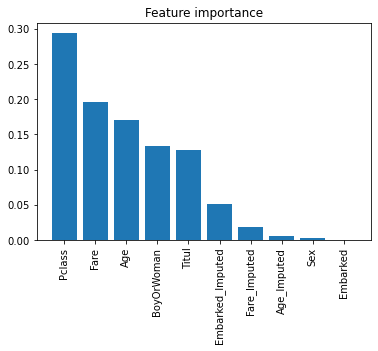

In [65]:
plt.figure()
plt.title('Feature importance')
plt.bar(range(len(names)), features_weights[indices])
plt.xticks(range(len(names)), names, rotation=90)
plt.show()

# Scoring

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pred = best_model.predict(X_valid)

print(confusion_matrix(y_valid, pred))
print(classification_report(y_valid, pred))
print(roc_auc_score(y_valid, pred))

[[152  16]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       168
           1       0.82      0.72      0.77       100

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268

0.8123809523809523


# Make Prediction & Submit

In [67]:
# final_model = RandomForestClassifier(n_estimators=250, criterion='gini', max_depth=8,
#                                     min_samples_split=6, min_samples_leaf=4, random_state=0)
# final_model.fit(X, y)

In [68]:
X_test = pd.get_dummies(test_data[features])
X_test

,Pclass,Fare,Age,BoyOrWoman,Titul,Embarked_Imputed,Fare_Imputed,Age_Imputed,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,7.8292,34.500000,0,3,0,0,0,0,1,0,0,1
1,3,7.0000,47.000000,1,3,0,0,0,0,0,1,1,0
2,2,9.6875,62.000000,0,3,0,0,0,0,1,0,0,1
3,3,8.6625,27.000000,0,3,0,0,0,0,0,1,0,1
4,3,12.2875,22.000000,1,3,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,8.0500,25.503337,0,3,0,0,1,0,0,1,0,1
414,1,108.9000,39.000000,1,3,0,0,0,1,0,0,1,0
415,3,7.2500,38.500000,0,3,0,0,0,0,0,1,0,1
416,3,8.0500,25.503337,0,3,0,0,1,0,0,1,0,1


In [69]:
results = best_model.predict(X_test)

In [70]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : results})
output.to_csv('jupyter_submission.csv', index=False)

# Result

## 0.79425 with 3561/53297 ~ top 7%